In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_manager as dm

sns.set(style="whitegrid", font_scale=1.4)

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = dm.load_dataframe("sigma_extraction_contest.csv")

In [6]:
df.head()

,noise,method_name,phantom_porosity,phantom_sigma,calculated_sigma,deviation_percent,processing_time_seconds
0,False,anvar,0.1,5,4.523576,9.528489,48.658745
1,False,grimax_h,0.1,5,5.656854,13.137085,0.413111
2,False,grimax_smoothed,0.1,5,5.656854,13.137085,0.410775
3,False,grimax_gaus,0.1,5,4.242641,15.147186,0.412048
4,False,anvar,0.1,10,8.293222,17.067781,48.676943


In [61]:
# df.loc[df.method_name=="anvar", "calculated_sigma"] = df[df.method_name=="anvar"].calculated_sigma / 1.6
# df.head()

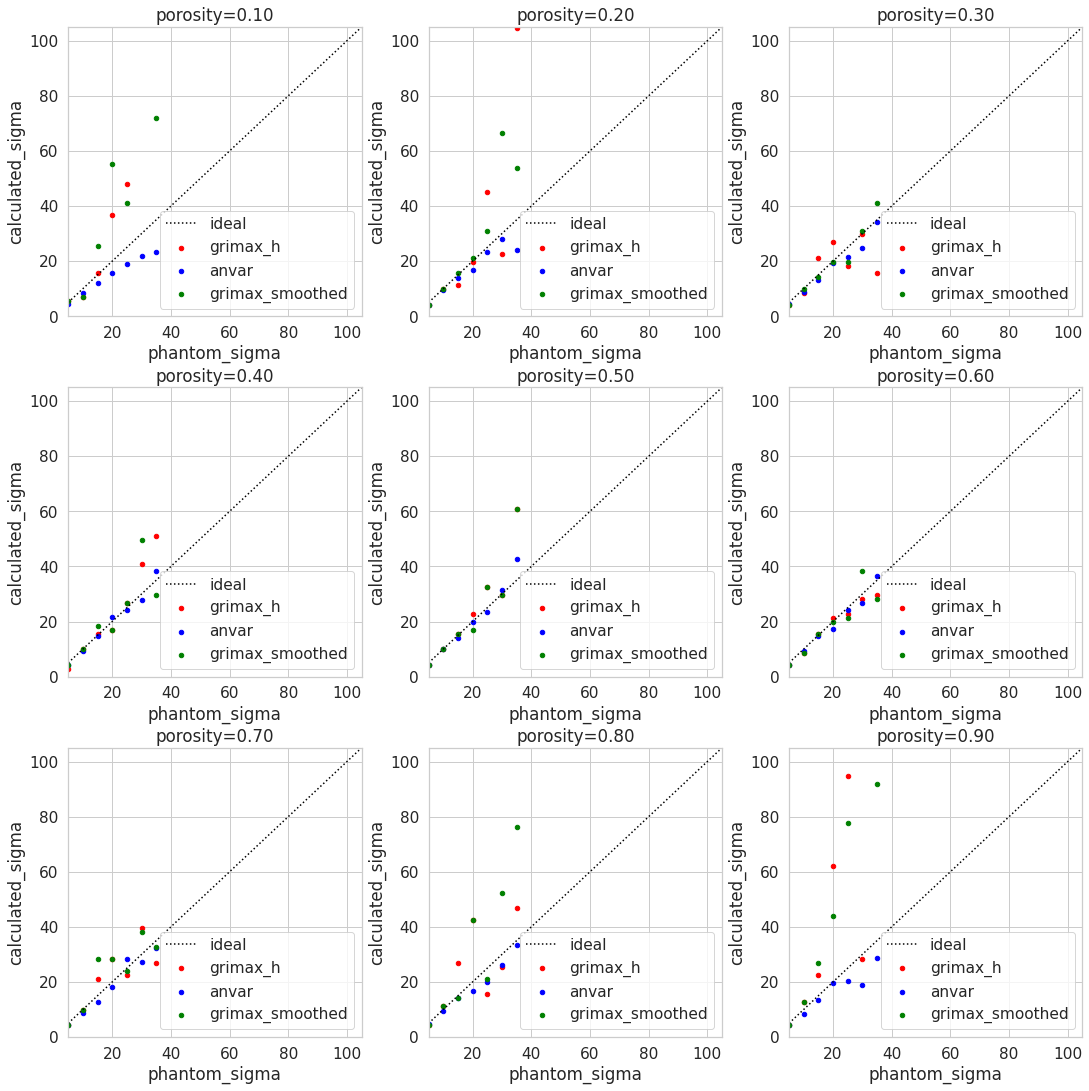

In [62]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax_h", "anvar", "grimax_smoothed"], ["red", "blue", "green"]):
        #polyfit
        equation = ""
        # if method == "anvar":
        #     x = df_p.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
        #     y = df_p.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
        #     fit = np.polyfit(x, y, 1)
        #     x_new = np.linspace(10, 35)
        #     ax.plot(x_new, x_new*fit[0]+fit[1], color='blue', linestyle="dotted")
        #     equation = f"{fit[1]:.2f}+{fit[0]:.2f}x"

        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           label=method+equation,
                                                           color=c)
        ax.set_title(f"porosity={p:.2f}")
        ax.set_ylim(0, 105)
        ax.set_xlim(5, 105)
    
    x = np.linspace(5, 105)
    ax.plot(x, x, color='black', linestyle="dotted", label="ideal")
    ax.legend()


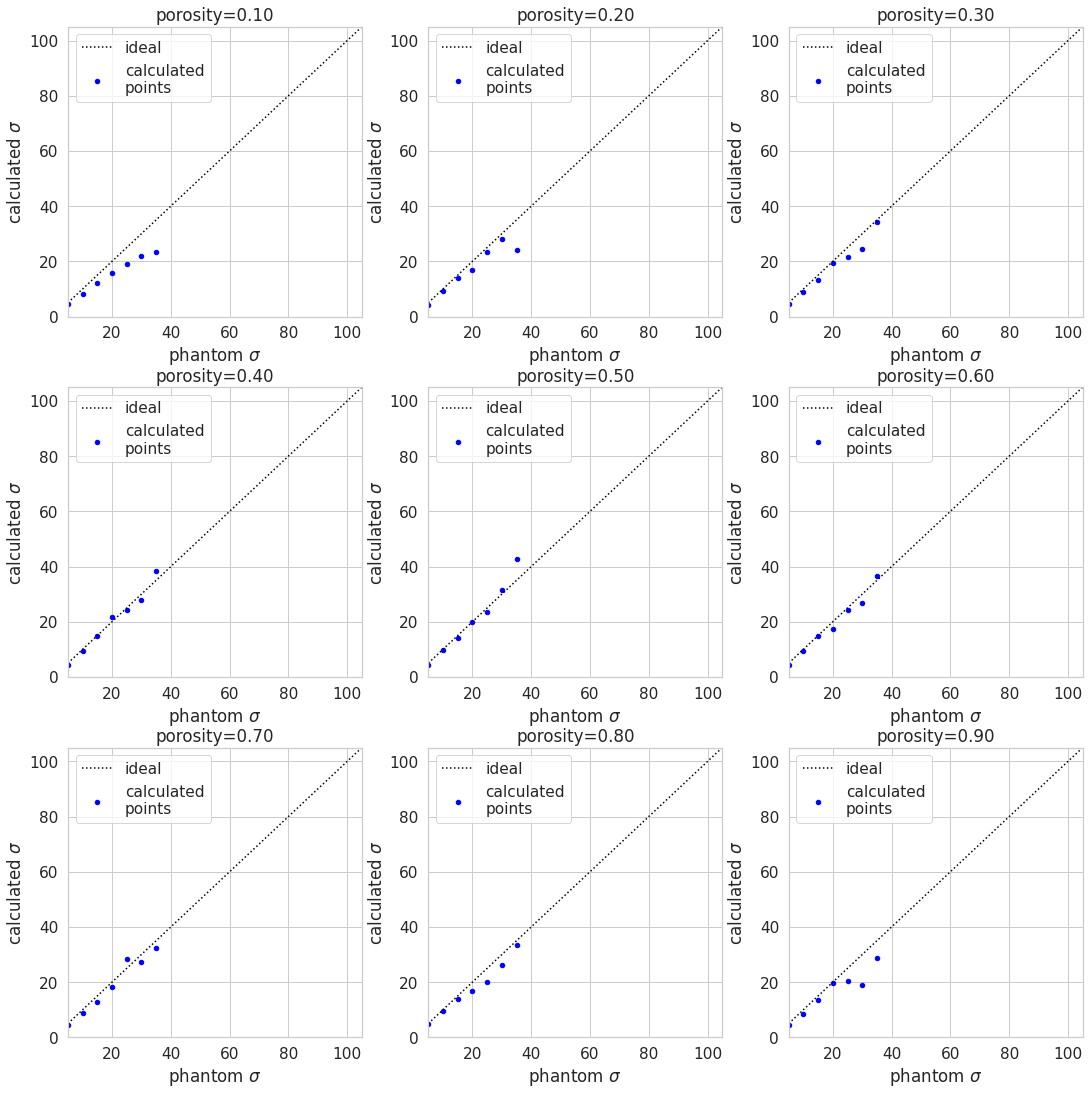

In [63]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["anvar"], ["blue"]):
        #polyfit
        equation = ""
        # if method == "anvar":
        #     x = df_p.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
        #     y = df_p.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
        #     fit = np.polyfit(x, y, 1)
        #     x_new = np.linspace(10, 35)
        #     ax.plot(x_new, x_new*fit[0]+fit[1], color='blue', linestyle="dotted")
        #     equation = f"{fit[1]:.2f}+{fit[0]:.2f}x"

        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           label="calculated\npoints",
                                                           color=c)
        ax.set_title(f"porosity={p:.2f}")
        ax.set_ylim(0, 105)
        ax.set_xlim(5, 105)
        ax.set_ylabel("calculated $\sigma$")
        ax.set_xlabel("phantom $\sigma$")
    
    x = np.linspace(5, 105)
    ax.plot(x, x, color='black', linestyle="dotted", label="ideal")
    ax.legend()


# Precision

In [55]:
df.groupby("method_name").get_group("grimax_smoothed").deviation_percent.mean()

36.27457787486989

In [56]:
df.groupby("method_name").get_group("anvar").deviation_percent.mean()

11.437805286482945

In [57]:
df.groupby("method_name").get_group("anvar").processing_time_seconds.mean()

48.78055971944705

In [58]:
df.groupby("method_name").get_group("grimax_smoothed").processing_time_seconds.mean()


0.3485639379359782

In [9]:
method = "grimax"
x = df.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
y = df.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
((x - y)**2).mean(axis=0)


101.9306913354865

In [10]:
method = "grimax_gaus"
x = df.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
y = df.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
((x - y)**2).mean(axis=0)

278.20001420742216

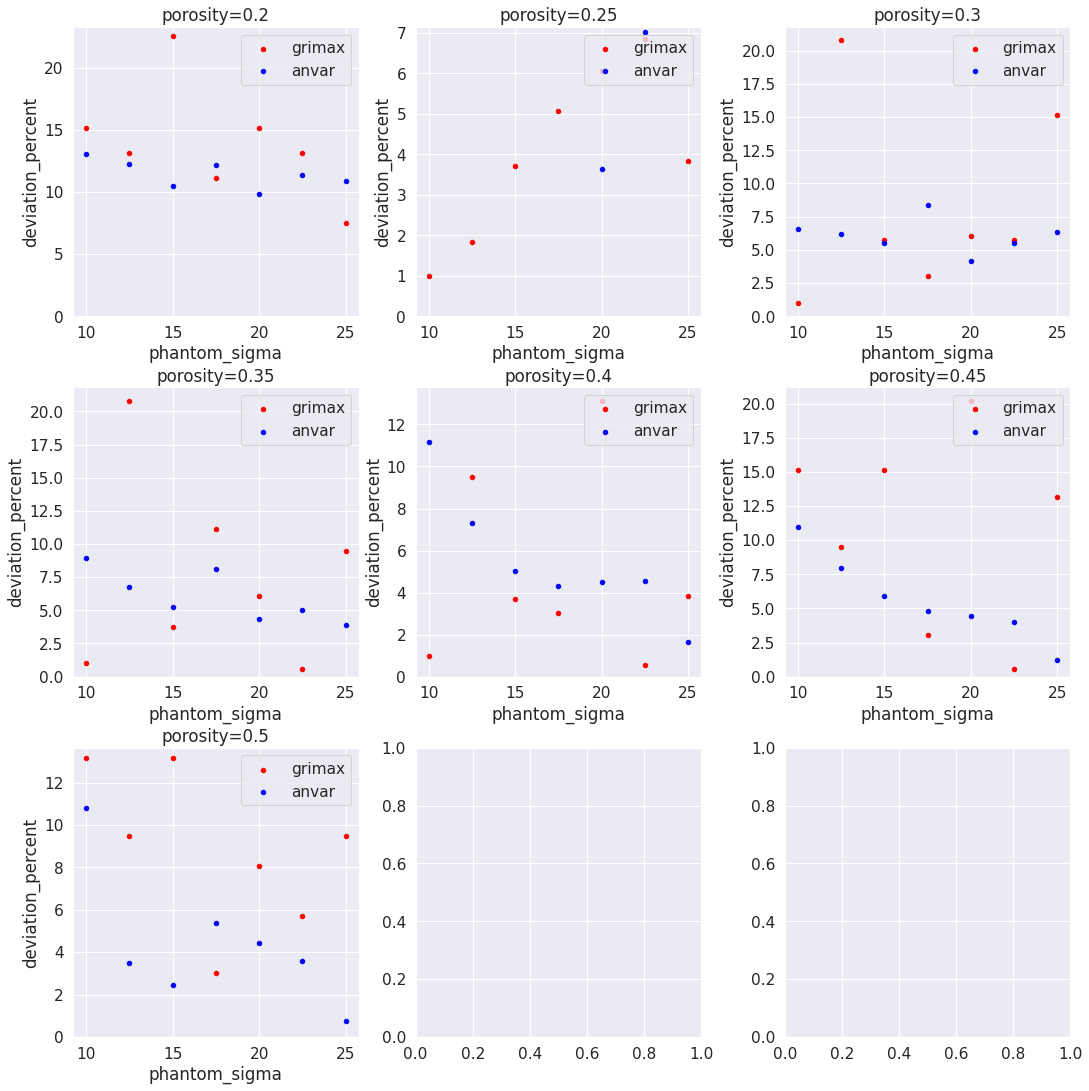

In [11]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax", "anvar"], ["red", "blue"]):
        #polyfit
        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="deviation_percent",
                                                           ax=ax,
                                                           label=method,
                                                           color=c)
        ax.set_title(f"porosity={p}")
        ax.set_ylim(ymin=0)

    ax.legend(loc=1)


In [7]:
import sys
sys.path.append('..')

import phantom_generator as pg
import wavelet_sigma_extractor as wse
import random
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu
from skimage.filters import rank


In [8]:
import h5py

h5f = h5py.File('experimental_data/sample.h5','r')

img2d_poly = h5f['layer1'][:]
h5f.close()

In [9]:
img2d_poly = img2d_poly.astype(float)
img2d_poly = (img2d_poly - img2d_poly.min()) / (img2d_poly.max() - img2d_poly.min())

In [10]:
sigma_poly = wse.get_sigma(img2d_poly, 0.1)
sigma_poly

3.76964629565

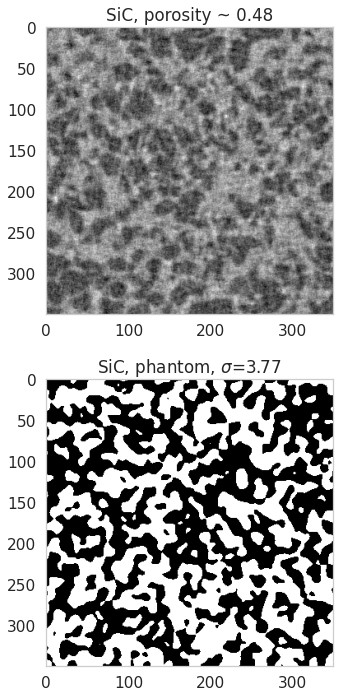

In [11]:
fig, axes = plt.subplots(nrows=2, figsize=(5,10))

axes[0].imshow(img2d_poly, cmap="gray")
axes[0].set_title("SiC, porosity ~ 0.48")
axes[1].imshow(pg.generate_phantom(img2d_poly.shape, 0.5, sigma_poly), cmap="gray")
axes[1].set_title(f"SiC, phantom, $\sigma$={sigma_poly:.2f}")

for ax in axes:
    ax.grid()

plt.tight_layout()

# PDL

In [12]:
root_folder = '/home/krivonosov/reconstruction/'
folder_name = 'f320cb2c-e829-47b5-91f9-142d46410134'
sample_name = folder_name+'.h5'
img_path = root_folder+folder_name+'/'+sample_name
img3d_PDL05 = h5py.File(img_path,'r')['Reconstruction'][:]

In [13]:

selem = np.array([[1,1,1],
                [1,1,1], 
                [1,1,1]])

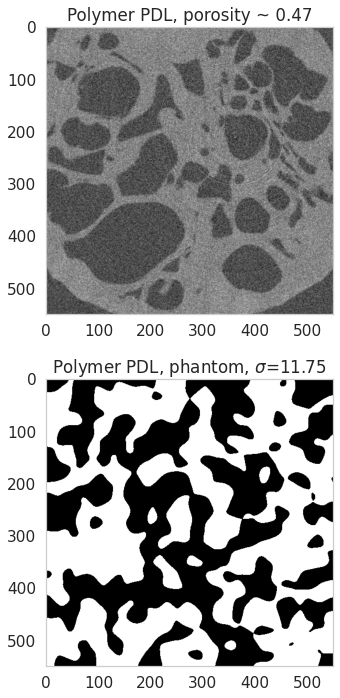

In [14]:
fig, axes = plt.subplots(nrows=2, figsize=(5,10))
img2d = img3d_PDL05[100][150:700, 150:700]

img2d_filt = rank.mean(img2d, selem)
img2d_filt = img2d_filt > threshold_otsu(img2d_filt)
porosity = 1 - img2d_filt.sum() / img2d_filt.size

sigma = wse.get_sigma(img2d, porosity)

axes[0].imshow(img2d, cmap="gray")
axes[0].set_title(f"Polymer PDL, porosity ~ {porosity:.2f}")
axes[1].imshow(pg.generate_phantom(img2d.shape, porosity, sigma), cmap="gray")
axes[1].set_title(f"Polymer PDL, phantom, $\sigma$={sigma:.2f}")

for ax in axes:
    ax.grid()

plt.tight_layout()

# PDGL

In [15]:
root_folder = '/home/krivonosov/reconstruction/'
folder_name = '79153edb-128c-4d08-b21b-701cae34c3bd'
sample_name = folder_name+'.h5'
img_path = root_folder+folder_name+'/'+sample_name
img3d_PDL05 = h5py.File(img_path,'r')['Reconstruction'][:]

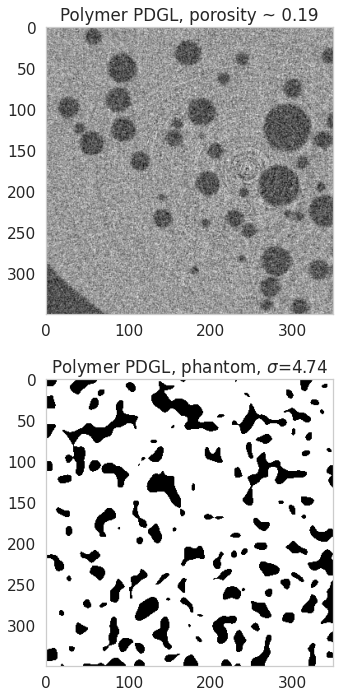

In [16]:
fig, axes = plt.subplots(nrows=2, figsize=(5,10))
img2d = img3d_PDL05[img3d_PDL05.shape[0]//2][200:550, 200:550]

img2d_filt = rank.mean(img2d, selem)
img2d_filt = img2d_filt > threshold_otsu(img2d_filt)
porosity = 1 - img2d_filt.sum() / img2d_filt.size

sigma = wse.get_sigma(img2d, porosity)

axes[0].imshow(img2d, cmap="gray")
axes[0].set_title(f"Polymer PDGL, porosity ~ {porosity:.2f}")
axes[1].imshow(pg.generate_phantom(img2d.shape, porosity, sigma), cmap="gray")
axes[1].set_title(f"Polymer PDGL, phantom, $\sigma$={sigma:.2f}")

for ax in axes:
    ax.grid()

plt.tight_layout()

In [3]:
k = [-3.29261187,  4.3127627,  -1.90858856,  0.9049531 ]
coefs = []
for porosity in [0.1, 0.2, 0.3, 0.4, 0.5]:
    coefs.append(porosity**3*k[0] + porosity**2*k[1] + porosity*k[2] + k[3])

coefs

[0.75392925913,
 0.66940500104,
 0.6316246545099999,
 0.6208325483200001,
 0.61727301125]

In [4]:
np.mean(coefs)

0.65861289485

In [7]:
np.mean(coefs[1:])

0.63478380378